In [17]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

### Modeling stock prices - Black-Scholes Model

<div class="alert alert-info">
    
We will now model stock price behavior using the <a href="https://en.wikipedia.org/wiki/Black_Scholes_model" targer="_blank">Black-Scholes model</a>, which employs a type of log-normal distribution to represent the growth of the stock price. Conceptually, this representation consists of two pieces:

a) Growth based on interest rate only


b) Volatility of the market



Stock prices evolve over time, with a magnitude dependent on their volatility. **The Black Scholes model treats this evolution in terms of a random walk**. To use the Black-Scholes model we assume:

   - some volatility of stock price.  Call this $\sigma$
   - a (risk-free) interest rate called $r$; and
   - the price of the asset is [geometric Brownian motion](https://en.wikipedia.org/wiki/Geometric_Brownian_motion), or in other words the log of the random process is a normal distribution.

which leads to the following expression for the predicted asset price:

$$ S_T = S_0 e^{(r - \frac{\sigma^2}{2})T + \sigma \sqrt{T} \,\epsilon}$$

meaning $ S_T/S_0 $ are normally distributed with mean $(r - \frac{\sigma^2}{2})T$ and variance  $\sigma^2 T$, where 

   - $\sigma$ is the volatility, or standard deviation on returns.
   - $\epsilon$ is a random value sampled from the normal distribution $\mathcal{N}(0,1)$
   - $S_T$ price of the asset at time $T$
   - $S_0$ initial price of the asset 
   - $r$ is the interest rate
    
</div>

To predict the asset price at time $T$, we will discretize the total time to maturity in small steps $\Delta t$. For each increment, we will use:

$$ S_{t+\Delta t} = S_t e^{(r - \frac{\sigma^2}{2})\Delta t + \sigma \sqrt{\Delta t} \,\epsilon}$$

For example, if we want to obtain the asset price after 30 days, and we use the assumption that prices change with the increment of one day, then our total number of price estimates $S_t$ is $N = 30$, and $\Delta t = 1/N$.

#### 1) The function `St_GBM` computes the price of an asset at time $t+\Delta t$ given the parameters 
($S_t,r,\sigma,\Delta t$)
We will use the function `np.random.normal()` to generate the random variable $\epsilon$

In [18]:
def St_GBM(St, r, sigma, deltat):
    epsilon = np.random.normal()
    St_next = St * math.exp(((r- (sigma ** 2)/2 ) * deltat + (sigma *(deltat ** (1/2)) * epsilon)))
    
    return St_next

This model now gives us a more accurate way to predict the future price. In example, we use the values for initial asset price `S0`, interest rate `r` and volatility `sigma` provided below. We will compute the daily price movements for a period of `N = 252` days (typical number of trading days in a year). 

In [19]:
S0 = 100        # initial asset value
r = 0.05        # interest rate
sigma = 0.1     # volatility
N = 252         # number of trading days
deltat= 1/N     # time step 

#### 2) Computing the daily asset prices over the period of one trading year:
This function computes the 1d numpy array `price` with shape `(N,)` that contains the daily price movements given by the Black-Scholes Model. 

In [20]:
def simulate_BS_price(S0, r, sigma, N):  
    price = []
    val = S0
    deltat = 1/N
    price.append(S0)
    for i in range(1, N):
        price.append(St_GBM(val,r,sigma,deltat))
        val = price[i]
        
    price = np.array(price)
    return price

(50.0, 150.0)

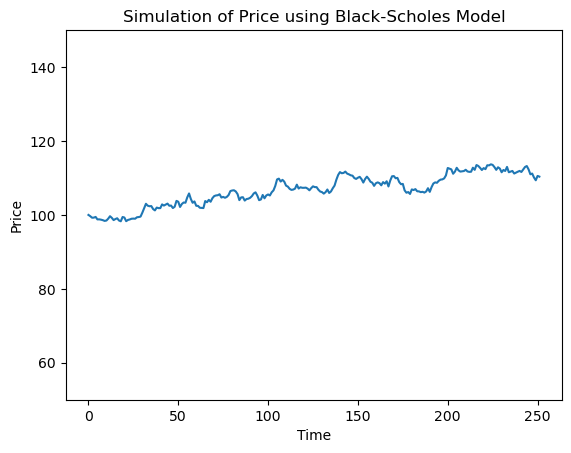

In [21]:
#Plotting
#initial asset value:100, Interest Rate:0.05, Volatility(sigma):0.1, Number of Trading Days:252 
plt.plot(simulate_BS_price(100, 0.05, 0.1, 252))   
plt.title('Simulation of Price using Black-Scholes Model')
plt.xlabel('Time')
plt.ylabel('Price')
plt.ylim([50,150])

#### 3)Volatility is usually not this small so lets test it with a higher volatility and see what happens to the stock prices

Text(0, 0.5, 'Price')

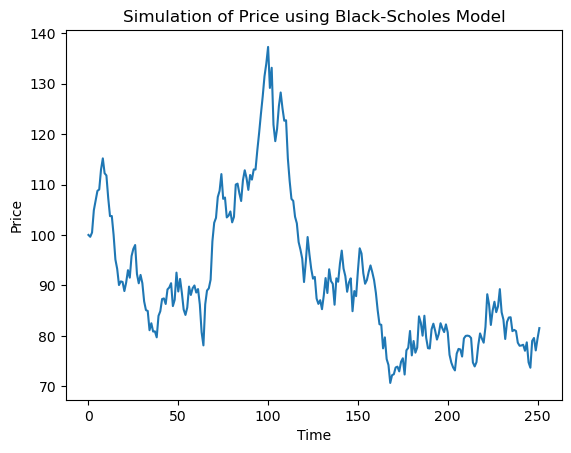

In [22]:
sigma = 0.5 #volatility
price_sigma = simulate_BS_price(100, 0.05, sigma, 252)
plt.plot(price_sigma)   
plt.title('Simulation of Price using Black-Scholes Model')
plt.xlabel('Time')
plt.ylabel('Price')

<div class="alert alert-info">
We have successfully simulate a year’s worth of future daily price data. Unfortunately this does not provide insight into risk and return characteristics of the stock as we only have one randomly generated path. The likelyhood of the actual price evolving exactly as described in the above charts is pretty much zero. Below we modify the above code to run multiple numerical experiments (or simulations). 
</div>

#### Perform M=1000 different numerical experiments, each one with N = 252 days
For each numerical experiment, we determine the array `price` using N = 252 days.
Next we compute the 2d array `price_M` with shape `(N,M)`, where each column stores the array `price` for each numerical experiment.

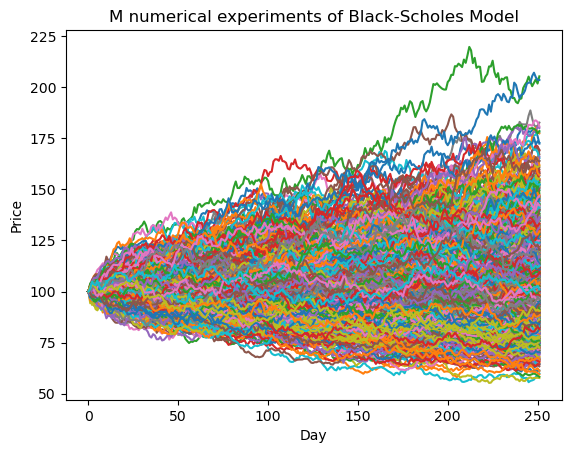

In [24]:
S0 = 100 
r = 0.05 
sigma = 0.2 
N = 252 
M = 1000  # Number of numerical experiments
price_M = np.zeros((N,M))
for i in range(M):
    price_M[:,i] = simulate_BS_price(S0,r,sigma,N)
plt.figure()
plt.plot(price_M);
plt.title ('M numerical experiments of Black-Scholes Model');
plt.xlabel('Day');
plt.ylabel('Price');

<div class="alert alert-info">
The spread of final prices is quite large! Let's take a further look at this spread. Here we define the variable `predicted_prices` to store the predicted asset prices for day 252 (last day) for all the M=1000 numerical experiments. 

Text(0, 0.5, 'Number of Occurrences')

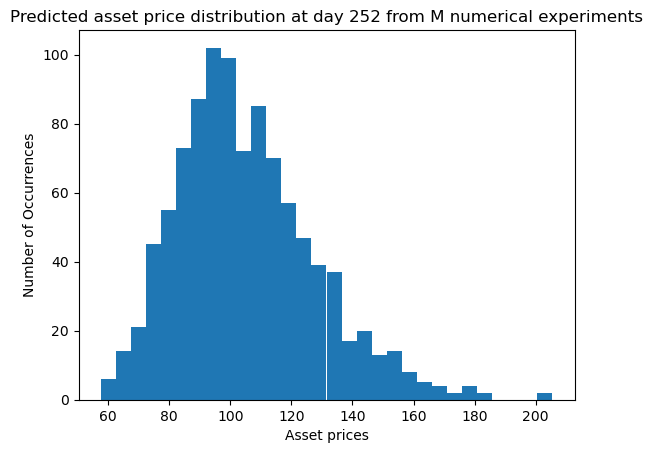

In [26]:
predicted_prices = price_M[-1,:] 
plt.figure()
plt.hist(predicted_prices,30);
plt.title('Predicted asset price distribution at day 252 from M numerical experiments')
plt.xlabel('Asset prices')
plt.ylabel('Number of Occurrences')

- `mean_price`: Calculate the mean of the distribution for the stock on the last day. 

- `std_price`: Calculate the standard deviation of the distribution for the stock on the last 

In [34]:
mean_price = np.mean(predicted_prices)
std_price = np.std(predicted_prices)

## We now have a prediction for a future price for a given stock.

In [33]:
print('expected value for the future asset price = ', mean_price)
print('standard deviation for the future asset price = ', std_price)

expected value for the future asset price =  105.30012575533023
standard deviation for the future asset price =  22.630913574033585
